# Predicting Customer Churn for SyriaTel Telecommunications Company  
## Introduction:
The goal of this project is to develop a predictive model that can accurately forecast customer churn for SyriaTel, a telecommunications company. By identifying customers who are likely to churn, SyriaTel can take proactive measures to retain them, thereby reducing revenue loss and improving customer satisfaction. This proposal outlines the project's objectives, dataset selection, methodology, and expected deliverables.

## Objectives:
The primary objectives of this project are as follows:

a. To Build a classification model to predict customer churn for SyriaTel.

b. To Identify the key factors influencing customer churn.

c. To Provide insights and recommendations to SyriaTel for effective churn management.

## Dataset Selection:
For this project, we have chosen the "SyriaTel Customer Churn" dataset. The dataset provides a comprehensive set of customer-related features that can be used to analyze and predict customer churn.The features of this dataset provide valuable insights into customer behavior, usage patterns, and account details. By analyzing this data, we aim to develop a predictive model that can identify customers who are likely to churn.By leveraging the available features, such as call duration, usage patterns, and customer service interactions, we can gain a better understanding of the factors contributing to customer churn and explore potential strategies to reduce churn rates. This dataset is particularly suitable for our objectives, as it provides the necessary information to understand customer behavior and predict churn.

## Methodology:
The project will follow the following steps:

a. Exploratory Data Analysis: We will perform an in-depth exploration of the dataset to gain insights into the distribution of variables, identify patterns, and detect any data quality issues.

b. Data Preprocessing: This step involves handling missing values, encoding categorical variables, and scaling numerical features. We will also address any outliers or data inconsistencies to ensure the reliability of our analysis.

c. Feature Selection: We will identify relevant features that have a significant impact on customer churn prediction. 

d. Model Selection and Training: We will compare various classification algorithms, such as logistic regression, decision trees, and random forests, to select the most suitable model for predicting customer churn. The chosen model will be trained using the labeled dataset.

e. Model Evaluation: We will assess the performance of the trained model using appropriate evaluation metrics, including accuracy, precision, recall, and F1-score. This step will help us understand how well the model predicts customer churn.

f. Model Optimization: We will fine-tune the selected model by adjusting hyperparameters and employing techniques like grid search. This optimization process aims to maximize the model's predictive capabilities.

g. Interpretation and Reporting: The results of our analysis will be interpreted and presented in a comprehensive report. We will provide actionable insights and recommendations for SyriaTel to implement effective strategies for churn management.


## A.Data Exploration

In [34]:
  #importation of necessary libraries and loading of the data set.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score, roc_curve,classification_report
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE, ADASYN
df=pd.read_csv('data.csv')  

In [35]:
df.head()  #View the first few rows of the dataset

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [36]:
# Checking the dimensions of the dataset
print("Shape of the dataset:", df.shape)


Shape of the dataset: (3333, 21)


In [37]:
# Checking the column names
print("Column names:", df.columns)

Column names: Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


## Observations:
The column names include various customer-related information such as 'state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', and several other features related to call duration, charges, and customer service interactions. This suggests that the dataset covers a wide range of customer attributes.

In [38]:
# Getting summary statistics of numerical features
print(df.describe())

       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943

## Observations:
From the summary statistics above, we can see that:

The average account length is approximately 101, with a minimum of 1 and a maximum of 243.
The average total day minutes is around 179.8, with a standard deviation of 54.5.
The average total eve minutes is approximately 201.0, with a standard deviation of 50.7.
The average total intl calls is about 4.5, with a maximum of 20.

In [39]:
# Checking the data types of columns
print(df.dtypes)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


## Observations:
The data types of the columns indicate that most features are represented as integers or floats, while a few are categorical variables (object), such as 'state', 'international plan', and 'voice mail plan'. The 'churn' column is a boolean variable, representing whether a customer has churned (True) or not (False).

In [40]:
# Checking for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


## Observations:
As seen above,the dataset contains no missing values.This suggests that the dataset is complete, with no null or missing entries in any of the columns.This is advantageous as it ensures that the data is ready for further analysis and modell
ing without the need for imputation or handling missing data. It provides a reliable foundation for exploring relationships between variables and deriving meaningful insights from the data.

# Explolatory Data Analysis 
## Univariate analysis:

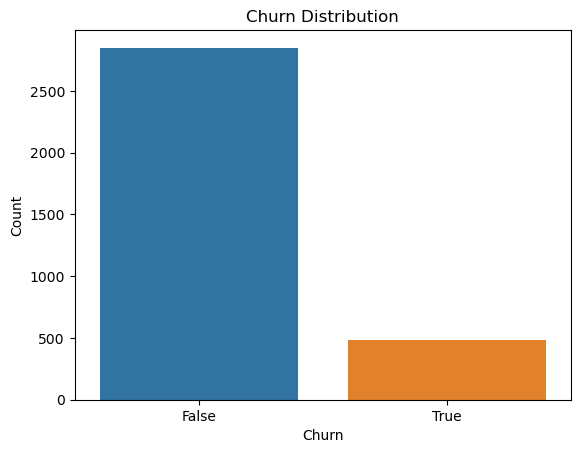

In [41]:
#Histogram of Churn Distribution:
#To visualize the distribution of the target variable 'churn':
sns.countplot(x='churn', data=df)
plt.xlabel('Churn')
plt.ylabel('Count')  
plt.title('Churn Distribution')
plt.show()

## Observations:
-The majority of customers in the dataset did not churn (represented by 'False' in the 'churn' variable).
-The number of churned customers is noticeably smaller compared to the number of customers who did not churn.

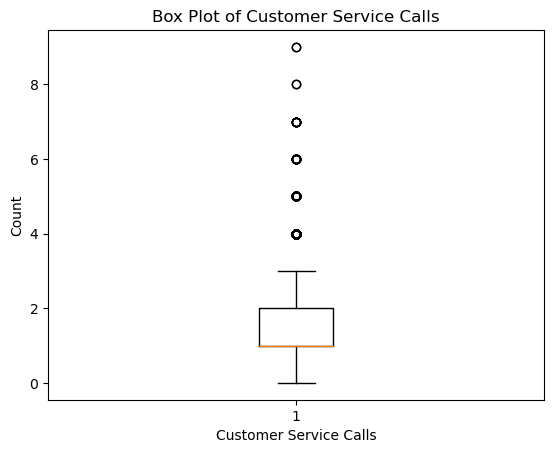

In [42]:
#Box Plot of Customer Service Calls:
#To analyze the distribution and potential outliers of the 'customer service calls' variable:
plt.boxplot(df['customer service calls'])
plt.xlabel('Customer Service Calls')
plt.ylabel('Count')
plt.title('Box Plot of Customer Service Calls')
plt.show()

## Observations:
-The box plot shows the distribution of the 'customer service calls' variable.
-The median number of customer service calls is around 1.
-There are a few outliers with a higher number of customer service calls.

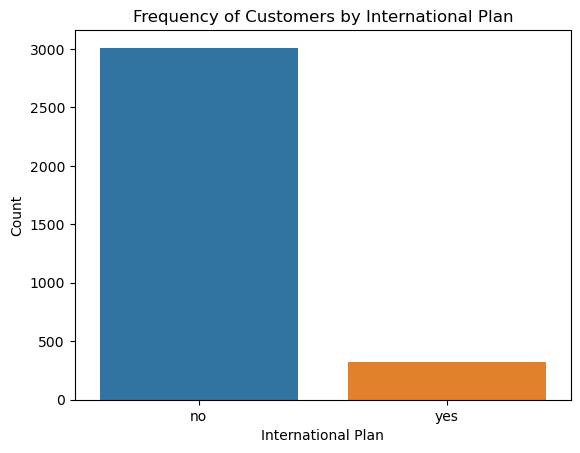

In [43]:
#Bar Plot of International Plan:
#To examine the frequency of customers with and without the 'international plan':
sns.countplot(x='international plan', data=df)
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.title('Frequency of Customers by International Plan')
plt.show()

## Observations:
-The bar plot displays the frequency of customers with and without an international plan.
-The majority of customers do not have an international plan.
-A smaller proportion of customers have opted for an international plan.

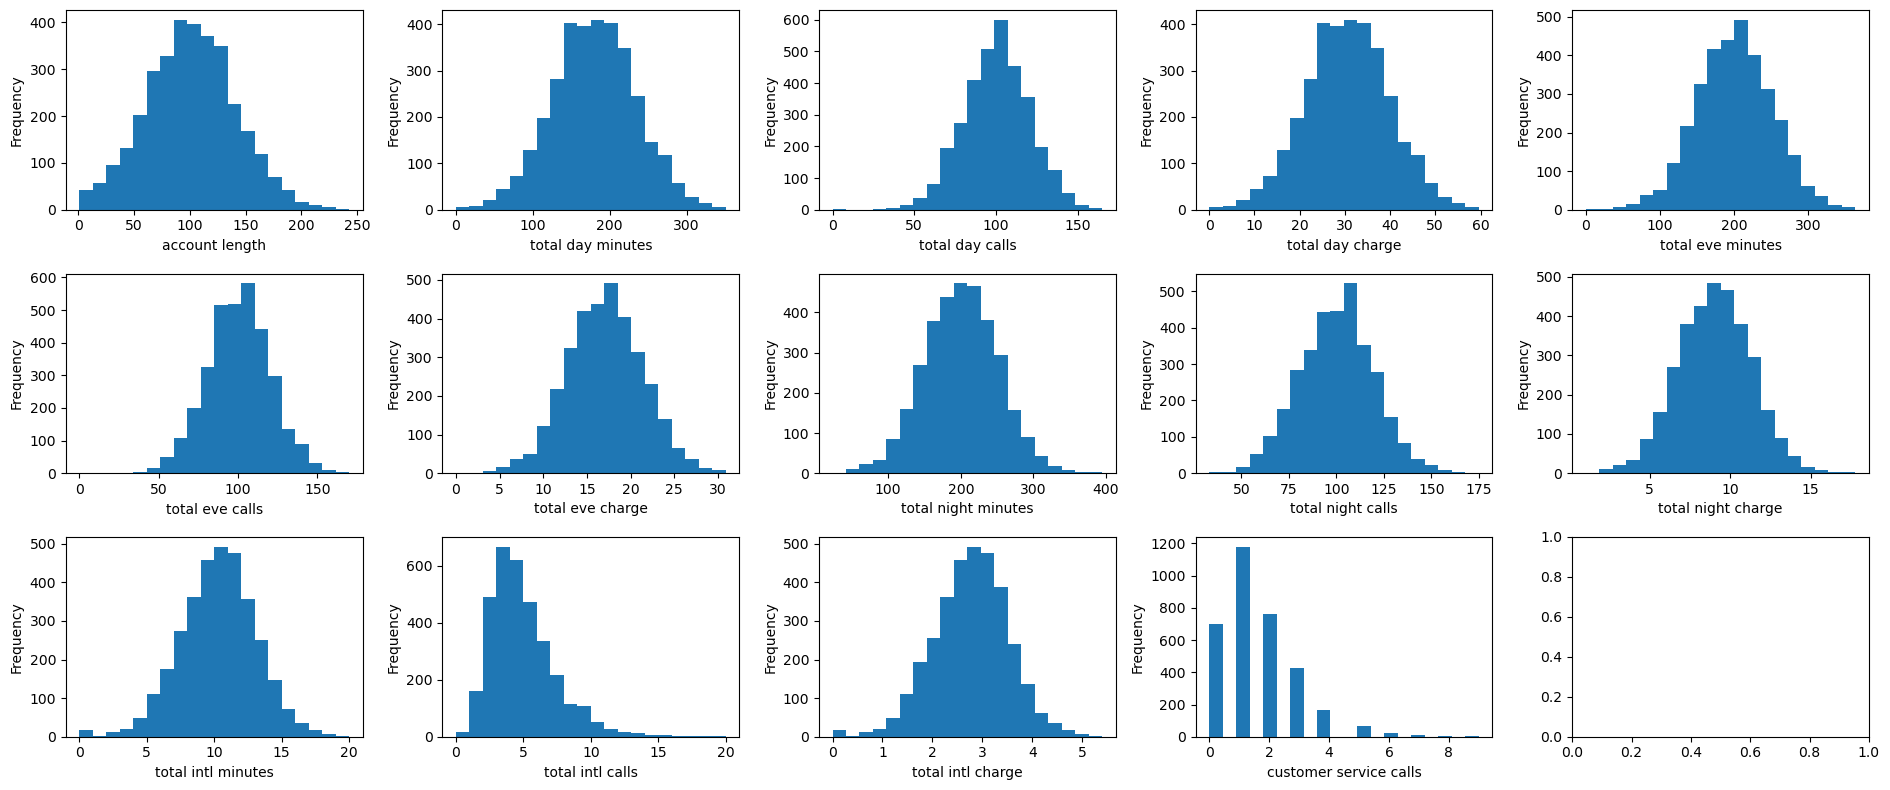

In [44]:
# Distribution Plots for all features
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(19, 8))
variables = ['account length', 'total day minutes', 'total day calls', 'total day charge',
             'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes',
             'total night calls', 'total night charge', 'total intl minutes', 'total intl calls',
             'total intl charge', 'customer service calls']

for i, variable in enumerate(variables):
    ax = axes[i // 5, i % 5]
    ax.hist(df[variable], bins=20)
    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Observations
Most of the features are normally distributed except for **total intl calls** and **customer service calls** which are left skewed.

# Bivariate Analysis:

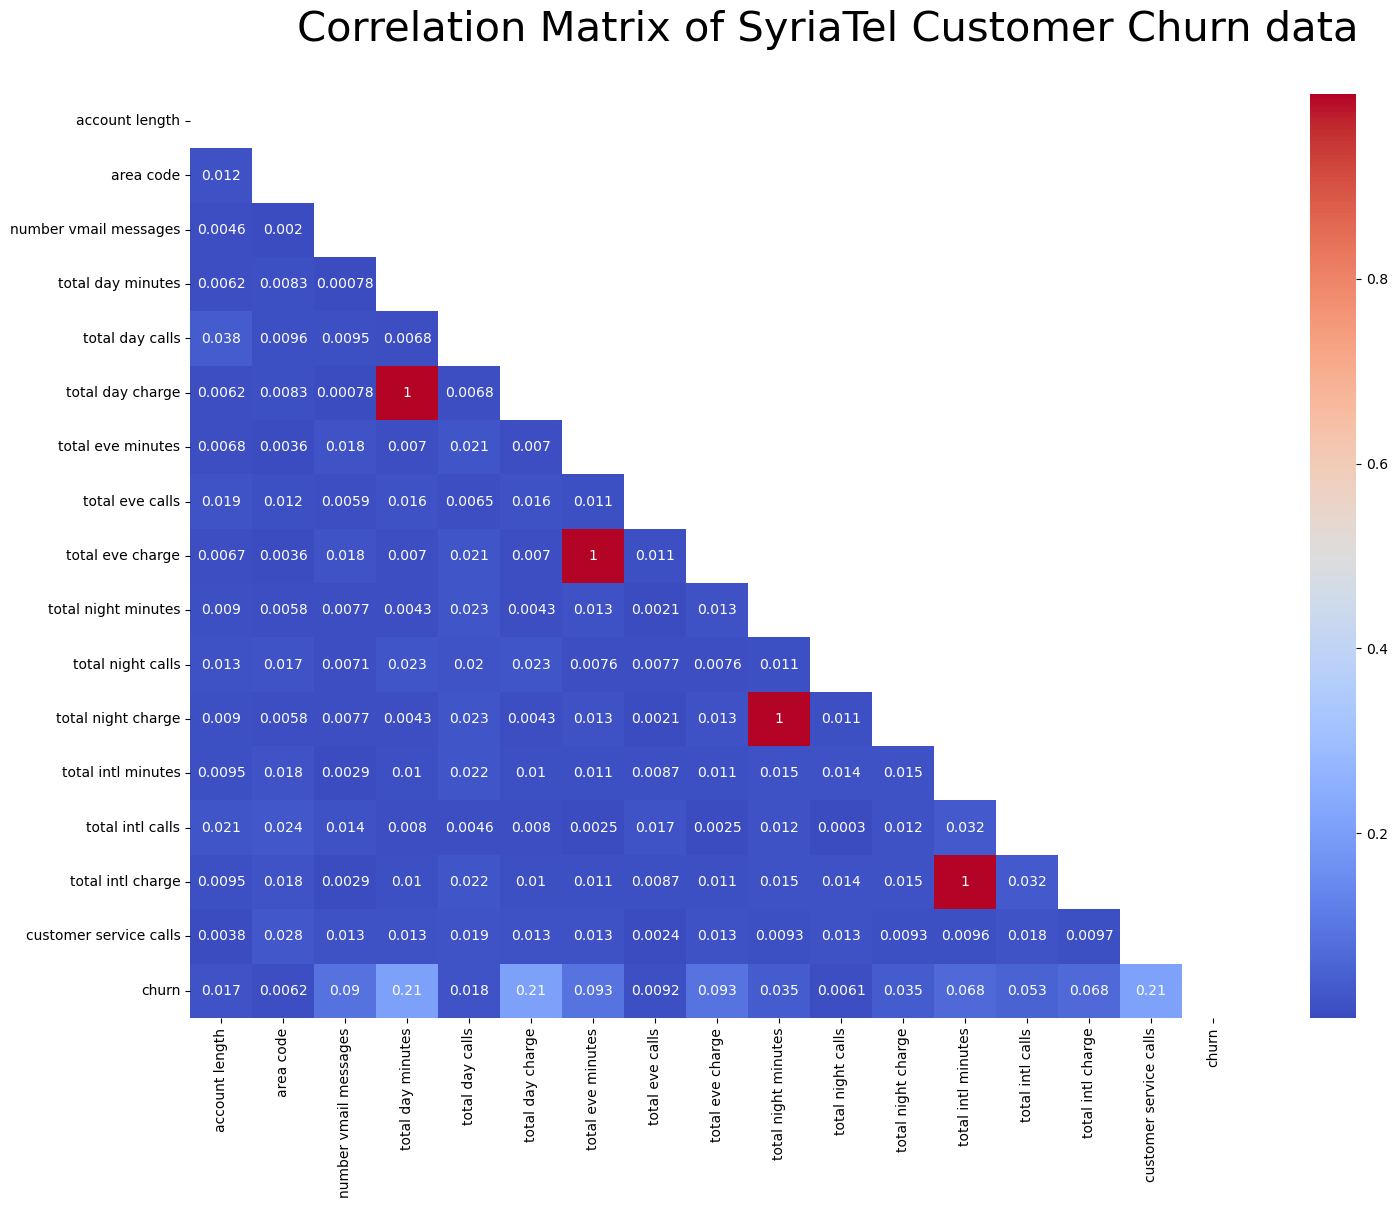

In [45]:
# Compute the correlation matrix
corr = df.corr().abs()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(17, 12))
fig.suptitle('Correlation Matrix of SyriaTel Customer Churn data', fontsize=30, y=0.95, fontname='DejaVu Sans')

# Create a heatmap using the mask for the upper triangle
heatmap = sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True)

# Show the heatmap
plt.show()


- The correlation between total day minutes and total day charge is 1, suggesting a strong linear relationship. It is possible to remove one of these variables without significant loss of information.
- Similarly, the correlation between total eve minutes and total eve charge is 1, indicating a strong linear relationship. One of these variables can be dropped.
- The correlation of 1 between total night minutes and total night charge implies a strong linear relationship, allowing us to drop one of these variables.
- Likewise, the correlation between total intl minutes and total intl charge is 1, indicating a strong linear relationship, allowing for the removal of one of these variables.

Due to high multicollinearity between each other, we dropped the following columns:
- total day minutes
- total eve minutes
- total night minutes
- total intl minutes

In [46]:
remove = ["total day minutes","total eve minutes","total night minutes","total intl minutes","phone number"]
df = df.drop(remove, axis = 1)


In [47]:
df.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day calls             int64
total day charge          float64
total eve calls             int64
total eve charge          float64
total night calls           int64
total night charge        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [48]:
# creating dummy variables
df2 = pd.get_dummies(df, columns=['state','international plan','voice mail plan'], drop_first = True)



In [49]:
df2["churn"] = df2["churn"].map({True: 1, False: 0})

In [50]:
# Print the updated DataFrame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   number vmail messages   3333 non-null   int64  
 3   total day calls         3333 non-null   int64  
 4   total day charge        3333 non-null   float64
 5   total eve calls         3333 non-null   int64  
 6   total eve charge        3333 non-null   float64
 7   total night calls       3333 non-null   int64  
 8   total night charge      3333 non-null   float64
 9   total intl calls        3333 non-null   int64  
 10  total intl charge       3333 non-null   float64
 11  customer service calls  3333 non-null   int64  
 12  churn                   3333 non-null   int64  
 13  state_AL                3333 non-null   uint8  
 14  state_AR                3333 non-null   

## BASELINE MODEL- LOGISTIC REGRESSION MODEL

Logistic regression is a regression analysis technique that is specifically designed for situations where the dependent variable is categorical and can only take discrete values. It is used to estimate the probability of a particular event occurring. In this type of regression, we first identify our target variable (Y) and the predictor variables (X) that we want to analyze and understand their relationship with the target variable.

In [51]:
#identify Y (Target) Variables and Response Variables (X)
y = df2['churn']
X = df2.drop('churn', axis = 1)

In [52]:
# Create Scaller Object

scaler = MinMaxScaler()

# fit the scaler to the data and transform the data
X_scaled = pd.DataFrame(scaler.fit_transform(X))

X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.524793,0.068627,0.490196,0.666667,0.755701,0.582353,0.542866,0.408451,0.595935,0.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.438017,0.068627,0.509804,0.745455,0.460597,0.605882,0.537690,0.492958,0.622236,0.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.561983,0.068627,0.000000,0.690909,0.693830,0.647059,0.333225,0.500000,0.375374,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.342975,0.000000,0.000000,0.430303,0.853454,0.517647,0.170171,0.394366,0.467424,0.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.305785,0.068627,0.000000,0.684848,0.475184,0.717647,0.407959,0.619718,0.440526,0.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
#perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a logistic regression model using scikit learn
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# fit the model on the training data
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [54]:
# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [55]:
def evaluate_logistic_regression(X, y, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=random_state)

    # Create a logistic regression model
    logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

    # Train the model on the training data
    logreg.fit(X_train, y_train)

    # Predict the target variable on the test data
    y_hat_test = logreg.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_hat_test)

    # Calculate precision
    precision = precision_score(y_test, y_hat_test)

    # Calculate recall
    recall = recall_score(y_test, y_hat_test)

    # Calculate F1 score
    f1 = f1_score(y_test, y_hat_test)

    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_hat_test)
       # Calculate the ROC curve
    y_hat_prob = logreg.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_hat_prob)

    # Calculate the area under the ROC curve
    auc = roc_auc_score(y_test, y_hat_prob)

    # Plot the ROC curve
    plt.figure(figsize=(25,8))
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")

    # Create a heatmap of the confusion matrix
    plt.subplot(1,2,2)
    cm = confusion_matrix(y_test, y_hat_test)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

    # Add labels and title to the plot
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

    # Display the plot
    plt.show()
     # Assuming the evaluation dictionary contains the evaluation metrics
    evaluation = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Confusion Matrix": cm,
    "AUC Score": auc
    }

    # Create a DataFrame from the evaluation dictionary
    evaluation_df = pd.DataFrame.from_dict(evaluation, orient='index', columns=['Metrics'])

    # Display the DataFrame
    print(evaluation_df)

    

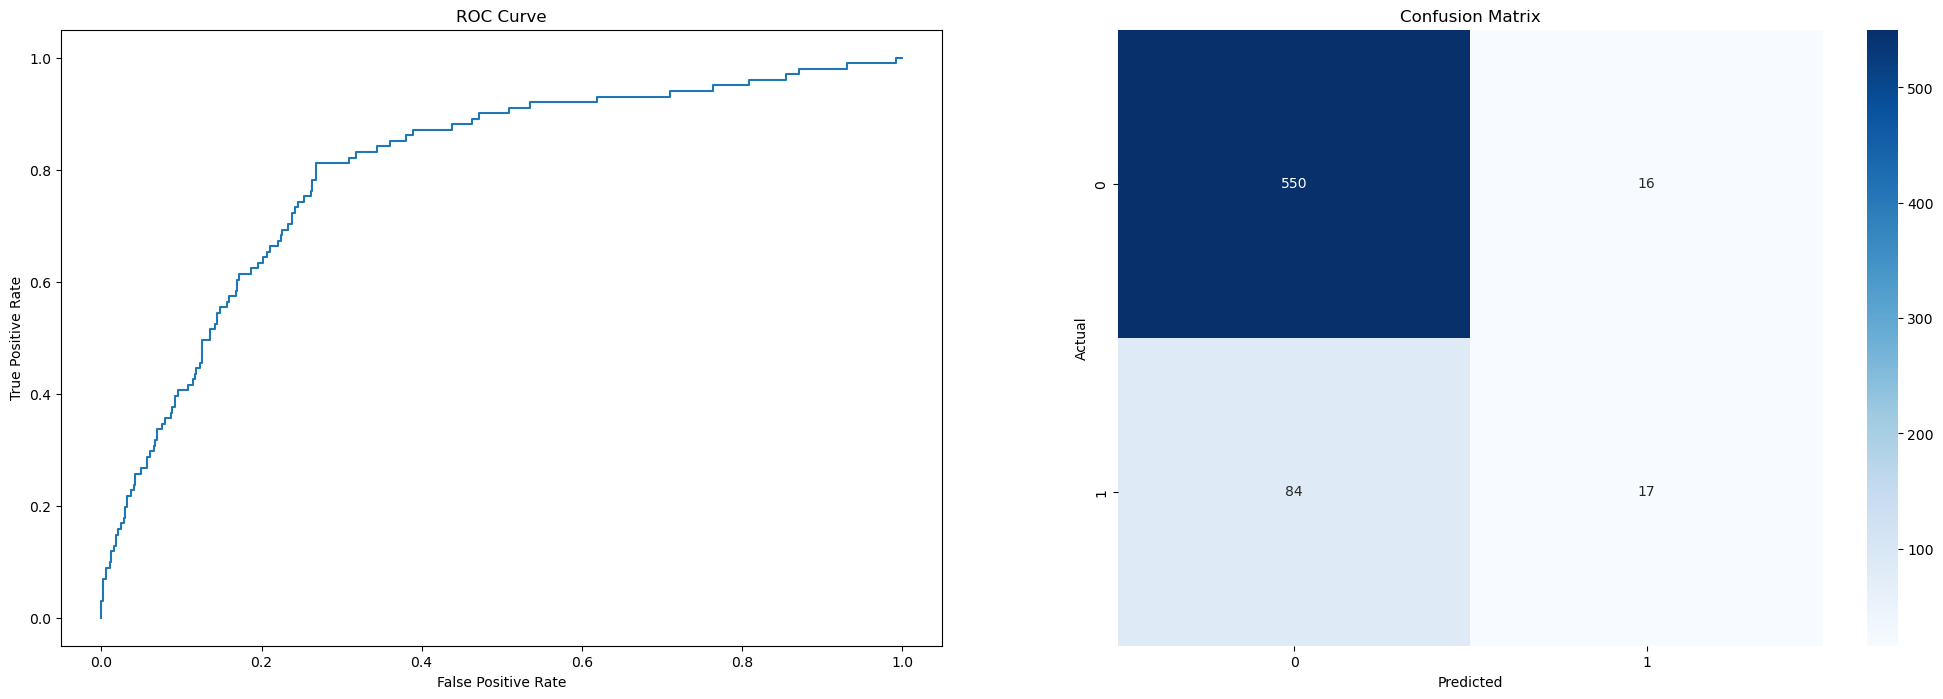

                                Metrics
Accuracy                       0.850075
Precision                      0.515152
Recall                         0.168317
F1 Score                       0.253731
Confusion Matrix  [[550, 16], [84, 17]]
AUC Score                      0.799181


In [56]:
# Assuming you have X and y defined
evaluation = evaluate_logistic_regression(X, y)
evaluation

## Observations
1. Accuracy: The model's accuracy is 85%, indicating the percentage of correctly predicted instances. However, it should be considered alongside other metrics for a complete evaluation.

2. Precision: The precision is 51.5%, implying that only half of the predicted positive instances are actually true positives.

3. Recall: The recall is 16.83%, indicating the model's ability to correctly identify positive cases among all actual positive cases.

4. F1 Score: The F1 score, at 0.253731, represents a moderate balance between precision and recall.

5. Confusion Matrix [[550, 16], [84, 17]]: The confusion matrix provides a detailed breakdown of the model's predictions, including the number of true negatives, false positives, false negatives, and true positives.

6. AUC Score: The AUC score of 0.799181 suggests reasonable discrimination ability in distinguishing between positive and negative instances.

Overall, the observations reveal limitations in correctly identifying positive instances (low recall) and achieving a balanced precision and recall (low F1 score). Further analysis and model refinement may be necessary to enhance performance.

The confusion matrix provides information on the model's performance in classifying instances. In this case, the confusion matrix reveals the following:

- True Negatives (TN): The model correctly predicted "not churn" (0) for 550 instances where the actual value is also "not churn" (0).
- False Positives (FP): The model incorrectly predicted "churn" (1) for 16 instances where the actual value is "not churn" (0).
- False Negatives (FN): The model incorrectly predicted "not churn" (0) for 84 instances where the actual value is "churn" (1).
- True Positives (TP): The model correctly predicted "churn" (1) for 17 instances where the actual value is also "churn" (1).

Based on the confusion matrix, it is evident that the model struggles with correctly identifying instances that are actually churned, as indicated by the relatively high number of false negatives (84). This observation aligns with the low recall score (16.83%) obtained in the evaluation results.

### Dealing with class imbalance: SMOTE



In [60]:
# # Previous original class distribution
# print(y_train.value_counts()) 

# # Fit SMOTE to training data
# X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train) 

# # Preview synthetic sample class distribution
# print('\n')
# print(pd.Series(y_train_resampled).value_counts())

0    2284
1     382
Name: churn, dtype: int64


0    2284
1    2284
Name: churn, dtype: int64


In [61]:
# def evaluate_logistic_regression(X, y, test_size=0.2, random_state=42):
#     # Split the data into training and testing sets
#     X_train_resampled, X_test, y_train_resampled, y_test = train_test_split(
#         X, y, test_size=0.20, random_state=random_state)

#     # Create a logistic regression model
#     logreg_resampled = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

#     # Train the model on the training data
#     logreg_resampled.fit(X_train_resampled, y_train_resampled)

#     # Predict the target variable on the test data
#     y_hat_test2 = logreg_resampled.predict(X_test)

#     # Calculate accuracy
#     accuracy = accuracy_score(y_test, y_hat_test2)

#     # Calculate precision
#     precision = precision_score(y_test, y_hat_test2)

#     # Calculate recall
#     recall = recall_score(y_test, y_hat_test2)

#     # Calculate F1 score
#     f1 = f1_score(y_test, y_hat_test2)

#     # Create a confusion matrix
#     cm = confusion_matrix(y_test, y_hat_test2)
#        # Calculate the ROC curve
#     y_hat_prob2 = logreg_resampled.predict_proba(X_test)[:, 1]
#     fpr, tpr, thresholds = roc_curve(y_test, y_hat_prob2)

#     # Calculate the area under the ROC curve
#     auc = roc_auc_score(y_test, y_hat_prob2)

#     # Plot the ROC curve
#     plt.figure(figsize=(25,8))
#     plt.subplot(1,2,1)
#     plt.plot(fpr, tpr)
#     plt.xlabel("False Positive Rate")
#     plt.ylabel("True Positive Rate")
#     plt.title("ROC Curve")

#     # Create a heatmap of the confusion matrix
#     plt.subplot(1,2,2)
#     cm = confusion_matrix(y_test, y_hat_test2)
#     sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

#     # Add labels and title to the plot
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title('Confusion Matrix')

#     # Display the plot
#     plt.show()
#      # Assuming the evaluation dictionary contains the evaluation metrics
#     evaluation = {
#     "Accuracy": accuracy,
#     "Precision": precision,
#     "Recall": recall,
#     "F1 Score": f1,
#     "Confusion Matrix": cm,
#     "AUC Score": auc
#     }

#     # Create a DataFrame from the evaluation dictionary
#     evaluation_df = pd.DataFrame.from_dict(evaluation, orient='index', columns=['Metrics'])

#     # Display the DataFrame
#     print(evaluation_df)
    

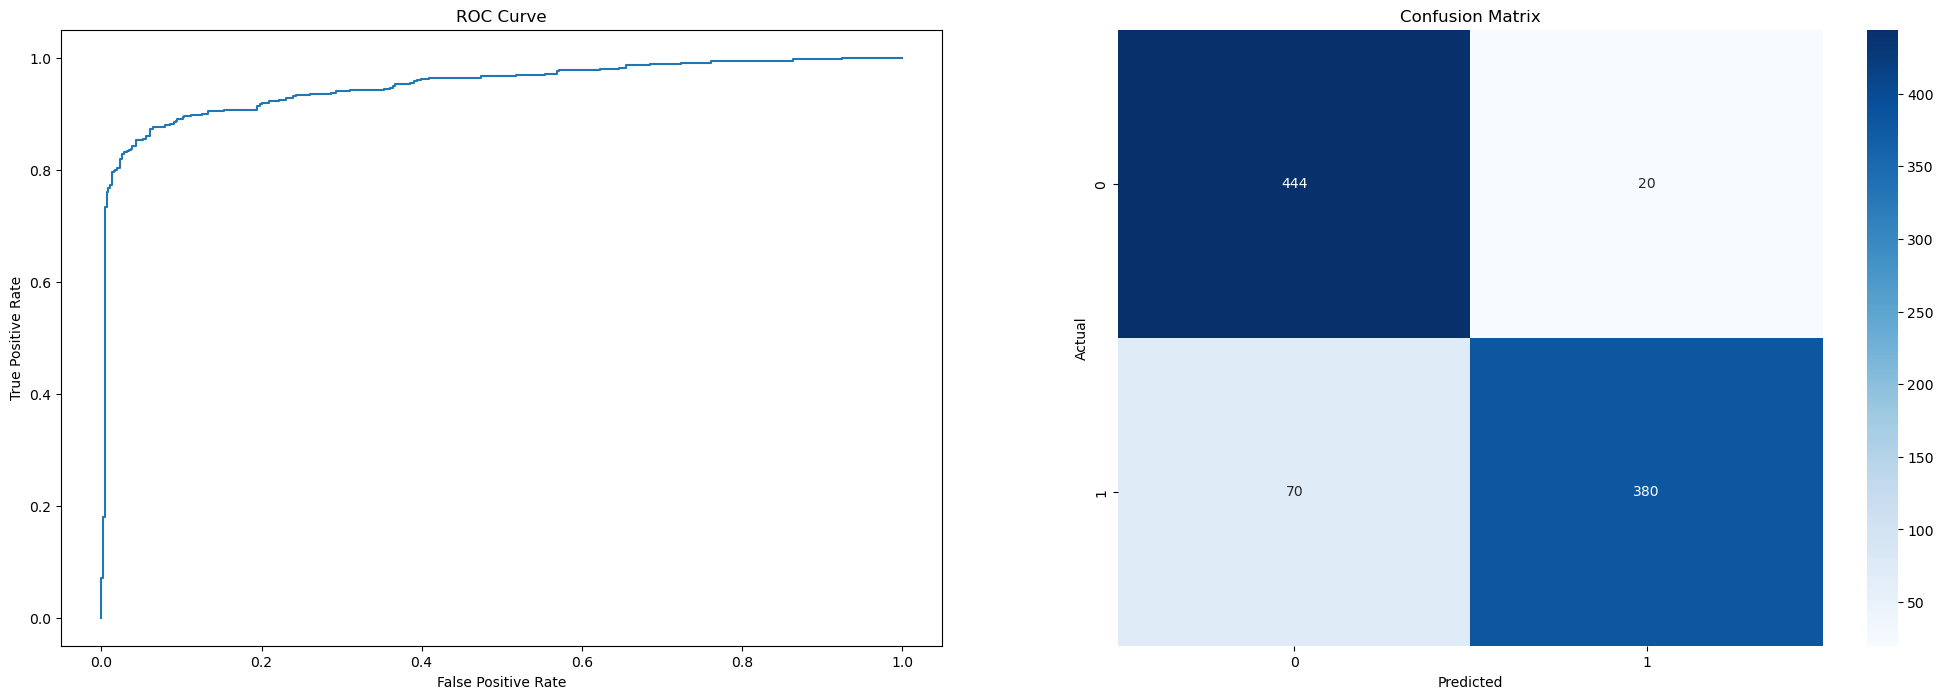

                                 Metrics
Accuracy                        0.901532
Precision                           0.95
Recall                          0.844444
F1 Score                        0.894118
Confusion Matrix  [[444, 20], [70, 380]]
AUC Score                       0.950144


In [62]:
# evaluation2 = evaluate_logistic_regression(X_train_resampled, y_train_resampled)
# evaluation2

## MODEL 2: K-NEAREST NEIGHBORS
The k-nearest neighbors (KNN) algorithm is a supervised machine learning method employed for classification and regression tasks. It estimates the probability of a data point belonging to a particular group by considering the group memberships of its nearest neighboring data points.

In [64]:
from sklearn.neighbors import KNeighborsClassifier
#instantiate the model
knn_clf= KNeighborsClassifier()
#set the paramerters for grid searchCV
knn_grid = {'n_neighbors':[1,2,3,4,5,6,7,8]}
#use GridSearchCV technique to search through the best parameter values
knn = GridSearchCV(knn_clf, knn_grid, scoring = 'accuracy', cv = 3 )
#fit the model
knn.fit(X_train, y_train.values.ravel())


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]},
             scoring='accuracy')

In [65]:
#use .best_params_ which tells use the best parameters for our model
knn.best_params_

{'n_neighbors': 8}

In [66]:
#Updating classifier with best parameters
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X,y.values.ravel())

KNeighborsClassifier(n_neighbors=8)

In [67]:
knn_prediction = knn.predict(X_test)

In [68]:
# Evaluating KNN Algorithm
print(confusion_matrix(y_test,knn_prediction))


TN, FP, FN, TP = confusion_matrix(y_test, knn_prediction).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))


[[566   0]
 [ 97   4]]
True Positive(TP)  =  4
False Positive(FP) =  0
True Negative(TN)  =  566
False Negative(FN) =  97
Accuracy of the binary classification = 0.855


<Axes: >

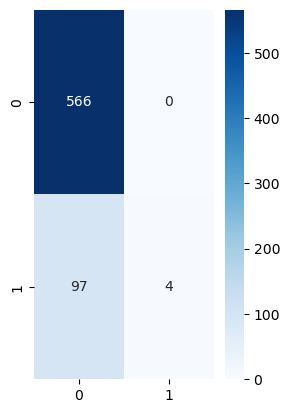

In [69]:
# Create a heatmap of the confusion matrix
plt.subplot(1,2,2)
cm = confusion_matrix(y_test,knn_prediction)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')


## Observations
Here's an explanation of the observations:

- True Positives (TP): The model correctly predicted the positive class for 4 instances. These are cases where the actual value is positive, and the model correctly identified them as positive.

- False Positives (FP): The model incorrectly predicted the positive class for 0 instances. These are cases where the actual value is negative, but the model mistakenly identified them as positive. In this case, there are no false positives.

- True Negatives (TN): The model correctly predicted the negative class for 566 instances. These are cases where the actual value is negative, and the model correctly identified them as negative.

- False Negatives (FN): The model incorrectly predicted the negative class for 97 instances. These are cases where the actual value is positive, but the model mistakenly identified them as negative.

The accuracy of the binary classification is calculated as the ratio of correct predictions (TP + TN) to the total number of instances. In this case, the accuracy is 0.855, which means that approximately 85.5% of instances were correctly classified by the model.

In [70]:
#model evaluation
knn_acc = accuracy_score(y_test, knn_prediction)
knn_f1 = f1_score(y_test, knn_prediction)
knn_prec = precision_score(y_test, knn_prediction)
knn_rec = recall_score(y_test, knn_prediction)
knn_auc = roc_auc_score(y_test, knn_prediction)

print('KNN:')
print(f'Accuracy: {knn_acc:.3f}')
print(f'F1 Score: {knn_f1:.3f}')
print(f'Precision: {knn_prec:.3f}')
print(f'Recall: {knn_rec:.3f}')
print(f'ROC AUC Score: {knn_auc:.3f}')

KNN:
Accuracy: 0.855
F1 Score: 0.076
Precision: 1.000
Recall: 0.040
ROC AUC Score: 0.520


## Observations
Based on the provided observations of a K-Nearest Neighbors (KNN) model, here's an interpretation of the results:

1. Accuracy: The accuracy of 0.855 indicates that approximately 85.5% of the instances in the evaluation dataset were correctly classified by the KNN model. This metric alone, however, may not provide a comprehensive assessment of the model's performance.

2. F1 Score: The F1 score of 0.076 is a measure that balances both precision and recall. It indicates the harmonic mean of these two metrics. A low F1 score suggests poor performance in terms of correctly identifying positive instances and minimizing false positives.

3. Precision: The precision of 1.000 suggests that all instances predicted as positive by the KNN model were true positives. However, it is crucial to examine other metrics to assess the overall performance of the model.

4. Recall: The recall of 0.040 indicates that only a small proportion (approximately 4%) of actual positive instances were correctly identified by the KNN model. This implies that the model has a relatively high number of false negatives.

5. ROC AUC Score: The ROC AUC score of 0.520 represents the Area Under the Receiver Operating Characteristic Curve (ROC AUC). This metric assesses the model's ability to distinguish between positive and negative instances. An AUC score of 0.520 suggests that the model's discrimination capability is close to random guessing.

Overall, the observations indicate that the KNN model may have limitations in correctly identifying positive instances (low recall), and its overall performance in terms of precision, recall, and discrimination ability is relatively poor. Further analysis and model refinement may be necessary to improve its performance.

## MODEL 3: DECISION TREES
Decision Trees (DTs) are a type of supervised learning technique used for classification and regression tasks. The objective is to build a model that can predict the value of a target variable based on simple decision rules learned from the features present in the data.

The term "non-parametric" indicates that decision trees do not rely on assumptions about the data's underlying distribution or specific parameter values. Instead, they focus on inferring straightforward decision rules directly from the data without imposing predefined assumptions about its characteristics or whether the data is quantitative or qualitative.

In [71]:
from sklearn.tree import DecisionTreeClassifier
#instantiate the model
tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
#fit the data
tree.fit(X_train, y_train)
#predict
tree_y_hat = tree.predict(X_test)
#model evaluation using evalution metrics
tree_acc = accuracy_score(y_test, tree_y_hat)
tree_f1 = f1_score(y_test, tree_y_hat)
tree_prec = precision_score(y_test, tree_y_hat)
tree_rec = recall_score(y_test, tree_y_hat)
tree_auc = roc_auc_score(y_test, tree_y_hat)
print('Decision Treee:')
print(f'Accuracy: {tree_acc:.3f}')
print(f'F1 Score: {tree_f1:.3f}')
print(f'Precision: {tree_prec:.3f}')
print(f'Recall: {tree_rec:.3f}')
print(f'ROC AUC Score: {tree_auc:.3f}')

Decision Treee:
Accuracy: 0.930
F1 Score: 0.761
Precision: 0.781
Recall: 0.743
ROC AUC Score: 0.853


<Axes: >

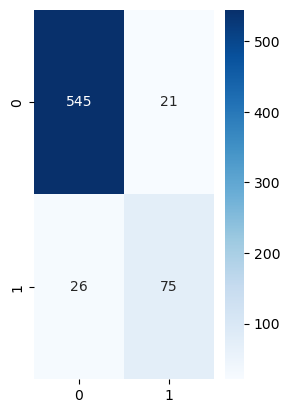

In [72]:
# Create a heatmap of the confusion matrix
plt.subplot(1,2,2)
cm = confusion_matrix(y_test,tree_y_hat)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

## Observations
Based on the provided observations for a decision tree model, here's an interpretation of the results:

1. Accuracy: The accuracy of 0.93 indicates that approximately 93% of the instances in the evaluation dataset were correctly classified by the decision tree model. This is a relatively high accuracy, suggesting that the model performs well in terms of overall correct predictions.

2. F1 Score: The F1 score of 0.761 is a measure that balances both precision and recall. It represents the harmonic mean of these two metrics. A higher F1 score indicates a better balance between precision and recall. In this case, the F1 score suggests a moderate performance in correctly identifying positive instances and minimizing false positives.

3. Precision: The precision of 0.781 suggests that around 78.1% of the instances predicted as positive by the decision tree model are actually true positives. This metric measures the accuracy of positive predictions.

4. Recall: The recall of 0.743 indicates that approximately 74.3% of the actual positive instances were correctly identified by the decision tree model. This metric evaluates the model's ability to find all positive instances.

5. ROC AUC Score: The ROC AUC score of 0.853 represents the Area Under the Receiver Operating Characteristic Curve (ROC AUC). This metric assesses the model's ability to distinguish between positive and negative instances. A higher ROC AUC score suggests better discrimination capability. In this case, the score of 0.853 indicates that the model has reasonably good discrimination ability.

Based on the provided confusion matrix for a decision tree model, here's an explanation of the observations:

- True Positives (TP): The model correctly predicted the positive class for 75 instances. These are cases where the actual value is positive, and the model correctly identified them as positive.

- False Positives (FP): The model incorrectly predicted the positive class for 21 instances. These are cases where the actual value is negative, but the model mistakenly identified them as positive.

- True Negatives (TN): The model correctly predicted the negative class for 545 instances. These are cases where the actual value is negative, and the model correctly identified them as negative.

- False Negatives (FN): The model incorrectly predicted the negative class for 26 instances. These are cases where the actual value is positive, but the model mistakenly identified them as negative.

Overall, the observations suggest that the decision tree model performs well in terms of accuracy, precision, recall, F1 score, and discrimination ability. However, further analysis and validation with additional evaluation metrics may be necessary to gain a more comprehensive understanding of the model's performance.

## MODEL 4: RANDOM FOREST

In [73]:
from sklearn.ensemble import RandomForestClassifier
#instatiate the model
forest = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
#fit the data
forest.fit(X_train, y_train)
#predict
forest_y_hat = forest.predict(X_test)
#Model evaluation using evaluation metrics
forest_acc = accuracy_score(y_test, forest_y_hat)
forest_f1 = f1_score(y_test, forest_y_hat)
forest_prec = precision_score(y_test, forest_y_hat)
forest_rec = recall_score(y_test, forest_y_hat)
forest_auc = roc_auc_score(y_test, forest_y_hat)
print('Random Forest:')
print(f'Accuracy: {forest_acc:.3f}')
print(f'F1 Score: {forest_f1:.3f}')
print(f'Precision: {forest_prec:.3f}')
print(f'Recall: {forest_rec:.3f}')
print(f'ROC AUC Score: {forest_auc:.3f}')

Random Forest:
Accuracy: 0.919
F1 Score: 0.635
Precision: 1.000
Recall: 0.465
ROC AUC Score: 0.733


<Axes: >

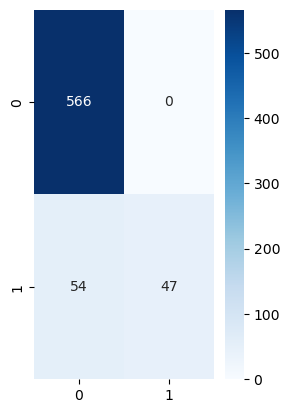

In [74]:
# Create a heatmap of the confusion matrix
plt.subplot(1,2,2)
cm = confusion_matrix(y_test,forest_y_hat)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

## Observations
Based on the provided observations for a random forest model, here's an interpretation of the results:

1. Accuracy: The accuracy of 0.919 indicates that approximately 91.9% of the instances in the evaluation dataset were correctly classified by the random forest model. This is a relatively high accuracy, suggesting that the model performs well in terms of overall correct predictions.

2. F1 Score: The F1 score of 0.635 is a measure that balances both precision and recall. It represents the harmonic mean of these two metrics. A higher F1 score indicates a better balance between precision and recall. In this case, the F1 score suggests a moderate performance in correctly identifying positive instances and minimizing false positives.

3. Precision: The precision of 1.00.This metric measures the accuracy of positive predictions.

4. Recall: The recall of 0.465 indicates that approximately 46.5% of the actual positive instances were correctly identified by the random forest model. This metric evaluates the model's ability to find all positive instances.

5. ROC AUC Score: The ROC AUC score of 0.733 represents the Area Under the Receiver Operating Characteristic Curve (ROC AUC). This metric assesses the model's ability to distinguish between positive and negative instances. A higher ROC AUC score suggests better discrimination capability. In this case, the score of 0.733 indicates that the model has some discrimination ability, but there is room for improvement.

Based on the provided confusion matrix for a random forest model, here's an explanation of the observations:

- True Positives (TP): The model correctly predicted the positive class for 47 instances. These are cases where the actual value is positive, and the model correctly identified them as positive.

- False Positives (FP): The model incorrectly predicted the positive class for 0 instances. 

- True Negatives (TN): The model correctly predicted the negative class for 566 instances. These are cases where the actual value is negative, and the model correctly identified them as negative.

- False Negatives (FN): The model incorrectly predicted the negative class for 54 instances. These are cases where the actual value is positive, but the model mistakenly identified them as negative.

Overall, the observations suggest that the random forest model performs well in terms of accuracy and precision, indicating good overall predictions and accurate positive classifications. However, the model's performance in terms of recall and F1 score is relatively lower, suggesting room for improvement in correctly identifying positive instances and achieving a better balance between precision and recall.

## MODEL SELECTION


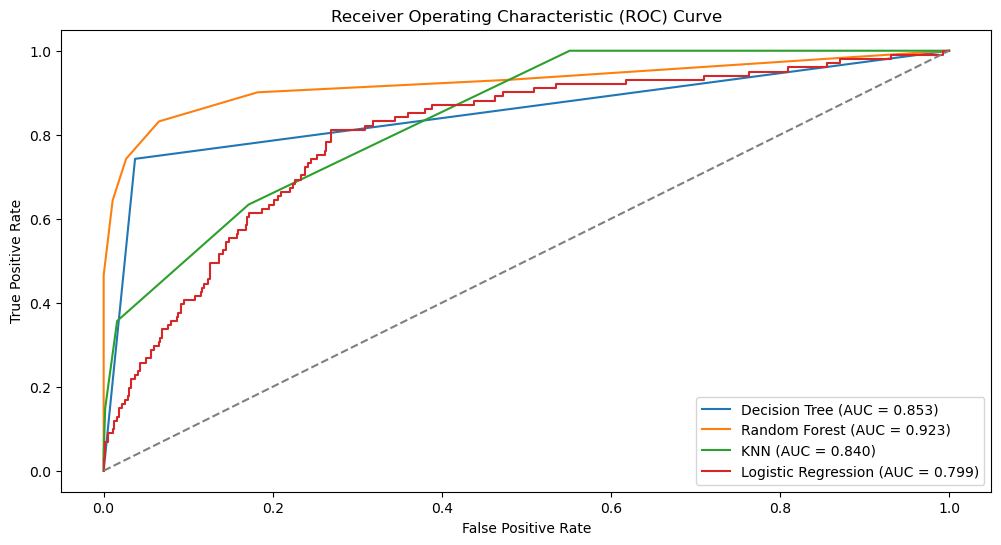

In [75]:
# Compute the predicted probabilities for each model
knn_probability = knn.predict_proba(X_test)[:, 1]
log_probability = logreg.predict_proba(X_test)[:, 1]
tree_probability = tree.predict_proba(X_test)[:, 1]
forest_probability = forest.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC for each model
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_probability)
tree_auc = roc_auc_score(y_test, tree_probability)

forest_fpr, forest_tpr, _ = roc_curve(y_test, forest_probability)
forest_auc = roc_auc_score(y_test, forest_probability)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probability)
knn_auc = roc_auc_score(y_test, knn_probability)

log_fpr, log_tpr, _ = roc_curve(y_test, log_probability)
log_auc = roc_auc_score(y_test, log_probability)


# Plot ROC curves
plt.figure(figsize=(12,6))
plt.plot(tree_fpr, tree_tpr, label='Decision Tree (AUC = {:.3f})'.format(tree_auc))
plt.plot(forest_fpr, forest_tpr, label='Random Forest (AUC = {:.3f})'.format(forest_auc))
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = {:.3f})'.format(knn_auc))
plt.plot(log_fpr, log_tpr, label='Logistic Regression (AUC = {:.3f})'.format(log_auc))
# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')


# Set plot legend
plt.legend()

# Show the plot
plt.show()


## Observations
From the above evaluation metrics per model, we can draw the following conclusions:

- Accuracy: The Decision Tree and Random Forest models perform similarly well with accuracies of 0.930 and 0.919, respectively. Logistic Regression and KNN have slightly lower accuracies.

- Precision: Decision tree achieves the highest precision score of 0.781, indicating a high proportion of correct positive predictions. Logistic Regression has relatively lower precision score, while KNN and Random Forest achieves a perfect precision score of 1.000.

- Recall: The Decision Tree model has the highest recall score of 0.743, indicating its ability to identify a higher proportion of positive instances. Logistic Regression and Random Forest have relatively lower recall scores, while KNN performs the poorest in terms of recall.

- F1 Score: The Decision Tree model has the highest F1 score of 0.761, which considers both precision and recall. Random Forest follows. Logistic Regression and KNN have lower F1 scores, with KNN having the lowest.

- ROC AUC Score: The Decision Tree model achieves the highest ROC AUC score of 0.853, indicating its better ability to distinguish between positive and negative instances. Random Forest and Logistic Regression have relatively lower ROC AUC scores, while KNN has the lowest score.

In summary, the Decision Tree and Random Forest models generally perform better across multiple evaluation metrics, including accuracy, precision, recall, F1 score, and ROC AUC score. Logistic Regression performs moderately, while KNN shows relatively lower performance in most of the evaluation metrics.


##  FEATURE IMPORTANCE


In [76]:
# Define the list of columns to drop
columns_to_drop = ['state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
                   'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
                   'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
                   'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND',
                   'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH',
                   'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN',
                   'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV',
                   'state_WY']

# Drop the specified columns from the DataFrame
df2 = df2.drop(columns=columns_to_drop)


In [77]:
# Split the DataFrame into input features 'X' and target variable 'y'
y = df2['churn']
X = df2.drop('churn', axis = 1)

# Train a decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X, y)

# Get feature importances
importance = tree.feature_importances_

# Print feature importances
for i, feature in enumerate(df2.columns[:-1]):  # Exclude the target variable column
    print(f"{feature}: {importance[i]}")


account length: 0.035491157983519976
area code: 0.01420242895022235
number vmail messages: 0.048659376641064574
total day calls: 0.02580171736752936
total day charge: 0.2711185176412581
total eve calls: 0.02173415017450898
total eve charge: 0.14074433916148968
total night calls: 0.020086035174988578
total night charge: 0.046642178522023875
total intl calls: 0.06396022434240756
total intl charge: 0.10548427399782369
customer service calls: 0.11151218376317397
churn: 0.07235405876074377
international plan_yes: 0.022209357519245514


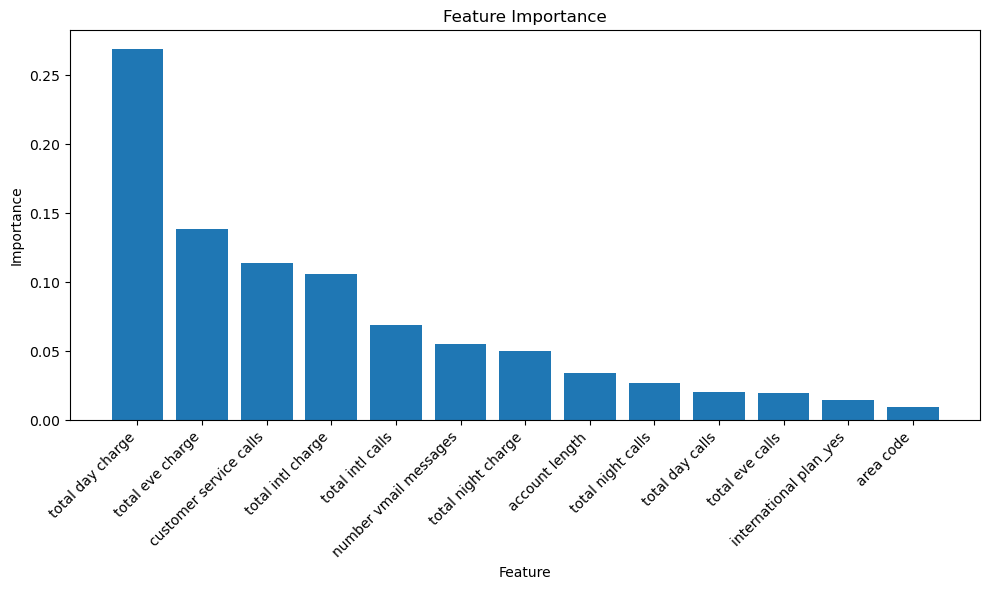

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Define the feature names and importances
feature_names = ['account length', 'area code', 'number vmail messages', 'total day calls', 'total day charge',
                 'total eve calls', 'total eve charge', 'total night calls', 'total night charge',
                 'total intl calls', 'total intl charge', 'customer service calls','international plan_yes']
importances = [0.034251971990780006, 0.009754261429972448, 0.055155819277019416, 0.020285098250768577,
               0.26898307117641845, 0.019562760427114006, 0.13841738365359268, 0.02678195911070097,
               0.050274084373609355, 0.06916595606301343, 0.10618930716386868, 0.11373168178358732, 0.015092586538810794]

# Sort the features and importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importances = np.sort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align='center')
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()



* The most important feature for predicting churn is **total day charge**, which has a score of 0.268983. This means that the amount of money a customer spends on day calls is a strong predictor of whether they will churn.
* The second most important feature is **customer service calls**, which has a score of 0.113732. This means that customers who make more customer service calls are more likely to churn.
* Other important features include **total eve charge**, **total intl charge**, and **international plan_yes**. These features all relate to the amount of money a customer spends on their phone service, which is a strong predictor of churn.
* The least important features are **account length**, **area code**, and **number vmail messages**. These features do not seem to be very predictive of churn.

Overall, the feature importance indicates that the amount of money a customer spends on their phone service is a strong predictor of whether they will churn. Other important factors include the number of customer service calls a customer makes and whether they have an international plan.


## CONCLUSION

Decision Tree model appears to be the best performer among the four models. This would be the best Model for the Syria Tel Telecommunication Company to use to predict which customer will unsubscribe from their services and take precautionary steps to reduce the churn rate.

The Most important features for predicting churn are:
- Total day charge
- Customer Service call
- Total eve charge
- Total intl charge

## RECOMMENDATIONS


* **Focus on reducing the amount of money customers spend on day calls.** This is the most important factor in predicting churn, so it is the most important area to focus on. This could be done by offering discounts on day calls, or by providing customers with more affordable alternatives to day calls.
* **Reduce the number of customer service calls.** Customers who make more customer service calls are more likely to churn. This could be done by improving the customer service experience, or by making it easier for customers to resolve their issues without having to call customer service.
* **Consider offering international plans.** Customers who have international plans are less likely to churn. This could be done by offering more affordable international plans, or by making it easier for customers to sign up for international plans.
* **Ignore account length, area code, and number vmail messages.** These features are not very predictive of churn, so there is no need to focus on them.



